<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Digit Recognizer</p>


<p style="font-family: 'Brush Script MT', cursive; font-size: 40px; text-align: center; color: #4682B4;">Author: Muhammad Furqan</p>


  [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadfurqan)

  [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadfurqan0)

  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/immuhammadfurqan/)

  [![Gmail](https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail)](mailto:sheikhfurqan048@gmail.com)

***Note:***

*Welcome to this beginner-friendly MNIST Notebook created with PyTorch! If you're new to PyTorch and want to understand its basic structure, this notebook is designed for you. We'll walk through the fundamental steps of building and training a neural network to recognize handwritten digits from the MNIST dataset. Whether you're just starting out or looking to strengthen your understanding of PyTorch, this notebook will provide a solid foundation.*

**Happy learning!**

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Import the Libraries</p>


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from torchvision import datasets

#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [2]:
#import external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
%matplotlib inline

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Spliting the Data</p>


In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11505783.44it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 314533.59it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2915959.27it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1897085.12it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_data.targets.size()

torch.Size([60000])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Data Loader</p>


In [9]:
loader = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1,
    ),
    'test': DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1,
    )
}

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Model</p>


In [10]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.drop1 = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training= self.training)
        x = self.fc2(x)
        
        return F.softmax(x)
        

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Train and Test Split</p>


In [11]:

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx %20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/ {len(loader['train'].dataset)} ({100. * batch_idx/ len(loader['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loader['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim =1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(loader['test'].dataset)
    print(f'\nTest Set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader["test"].dataset)} ({100 * correct / len(loader["test"].dataset):.0f}%)\n')

In [12]:
for epoch in range(1,5):
    train(epoch)
    test()

/tmp/ipykernel_18/424195984.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/ 60000 (0%)]	2.303433
Train Epoch: 1 [2000/ 60000 (3%)]	2.293191
Train Epoch: 1 [4000/ 60000 (7%)]	2.247858
Train Epoch: 1 [6000/ 60000 (10%)]	2.069777
Train Epoch: 1 [8000/ 60000 (13%)]	2.003441
Train Epoch: 1 [10000/ 60000 (17%)]	1.864663
Train Epoch: 1 [12000/ 60000 (20%)]	1.882486
Train Epoch: 1 [14000/ 60000 (23%)]	1.770719
Train Epoch: 1 [16000/ 60000 (27%)]	1.730758
Train Epoch: 1 [18000/ 60000 (30%)]	1.726472
Train Epoch: 1 [20000/ 60000 (33%)]	1.729823
Train Epoch: 1 [22000/ 60000 (37%)]	1.709915
Train Epoch: 1 [24000/ 60000 (40%)]	1.676029
Train Epoch: 1 [26000/ 60000 (43%)]	1.636015
Train Epoch: 1 [28000/ 60000 (47%)]	1.681683
Train Epoch: 1 [30000/ 60000 (50%)]	1.656820
Train Epoch: 1 [32000/ 60000 (53%)]	1.674175
Train Epoch: 1 [34000/ 60000 (57%)]	1.608043
Train Epoch: 1 [36000/ 60000 (60%)]	1.653156
Train Epoch: 1 [38000/ 60000 (63%)]	1.646342
Train Epoch: 1 [40000/ 60000 (67%)]	1.633841
Train Epoch: 1 [42000/ 60000 (70%)]	1.602354
Train Epoch: 1 [44000

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Prediction</p>


Prediction for index 10: 0


/tmp/ipykernel_18/424195984.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


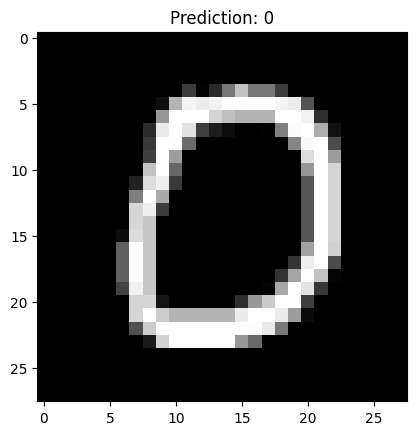

Prediction for index 15: 5


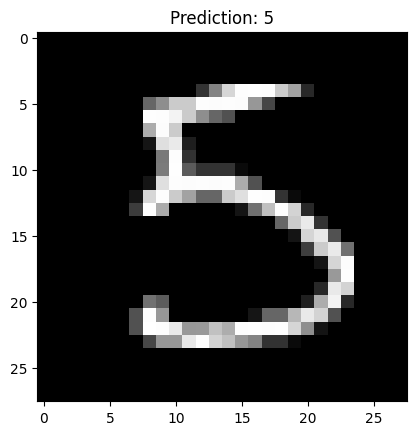

Prediction for index 20: 9


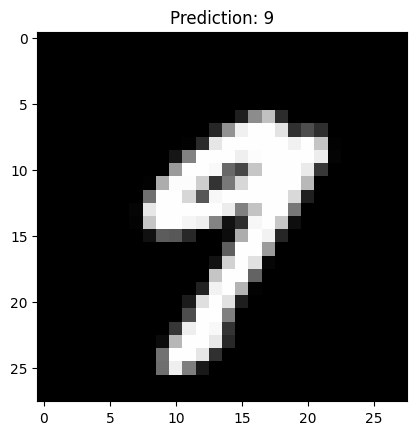

In [13]:
import matplotlib.pyplot as plt

model.eval()

# List of indices for the test samples you want to predict
indices = [10, 15, 20]  # Add more indices as needed

for idx in indices:
    data, target = test_data[idx]
    
    # Prepare the data for the model
    data = data.unsqueeze(0).to(device)
    
    # Get the model's output
    output = model(data)
    
    # Get the predicted label
    prediction = output.argmax(dim=1, keepdim=True).item()
    
    print(f"Prediction for index {idx}: {prediction}")
    
    # Convert the image data back to a format suitable for plotting
    image = data.squeeze(0).squeeze(0).cpu().numpy()
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediction: {prediction}")
    plt.show()
